<a href="https://colab.research.google.com/github/DevashishDeshmukh/Space-Crawlers/blob/main/population_center_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


In [3]:
import pandas as pd

# Replace 'pop.xlsx' with the correct file path if it's not in the same directory as your Python script
file_path = 'pop.xlsx'

# Read the Excel file
data = pd.read_excel(file_path)

# Get all column names
column_names = data.columns.tolist()

# Display all column names
print("Column Names:")
for column in column_names:
    print(column)


Column Names:
State  Code
District Code
Sub District Code
India/ State/ Union Territory/ District/ Sub-district
Name
Total/
Rural/
Urban
Number of villages
Unnamed: 7
Number of towns
Number of households
Population
Unnamed: 11
Unnamed: 12
Area
 (In sq. km)
Population per sq. km.


In [7]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('pop.xlsx')

# Filter rows where the specified column doesn't contain "STATE"
df = df[df['India/ State/ Union Territory/ District/ Sub-district'].str.contains('STATE', na=False)]

# Save the modified dataframe back to the Excel file or perform further operations
df.to_excel('filtered_pop.xlsx', index=False)


In [11]:
import pandas as pd

# Read the filtered_pop.xlsx file
df = pd.read_excel('filtered_pop.xlsx')

# Filter rows where the 'Total/\nRural/\nUrban' column value equals "Total"
df_filtered = df[df['Total/\nRural/\nUrban'] == 'Total']

# Save the filtered dataframe back to the same Excel file
df_filtered.to_csv('filtered_pop1.csv', index=False)


In [13]:
df = pd.read_csv('filtered_pop1.csv')
print(df.columns)


Index(['State  Code', 'Name', 'Number of villages', 'Number of towns',
       'Number of households', 'Population', 'Area\n (In sq. km)',
       'Population per sq. km.'],
      dtype='object')


In [1]:
import pandas as pd

# Read the 'filtered_pop1.csv' and 'addhar_centers.csv' files
df_pop = pd.read_csv('filtered_pop1.csv')
df_centers = pd.read_csv('addhar_centers.csv')

# Convert the columns to lowercase for consistency
df_pop['state'] = df_pop['state'].str.lower()
df_centers['state'] = df_centers['state'].str.lower()

# Group 'addhar_centers.csv' by state and count the number of centers in each state
centers_count = df_centers.groupby('state').size().reset_index(name='nos of addhar_centers in state')

# Merge the counts into the 'filtered_pop1.csv' based on the 'State Code' column
df_merged = pd.merge(df_pop, centers_count, left_on='state', right_on='state', how='left')

# Fill NaN values in case there are states without Aadhar center counts
df_merged['nos of addhar_centers in state'].fillna(0, inplace=True)

# Save the merged data with the added column to a new CSV file
df_merged.to_csv('filtered_pop_with_centers.csv', index=False)


In [2]:
print(df_merged.head())

   State  Code              state  Number of villages  Number of towns  \
0            1  jammu and kashmir                6337              122   
1            2   himachal pradesh               17882               59   
2            3             punjab               12168              217   
3            4         chandigarh                   5                6   
4            5        uttarakhand               15745              115   

   Number of households  Population  Area\n (In sq. km)  \
0               2119718    12541302              222236   
1               1483280     6864602               55673   
2               5513071    27743338               50362   
3                241173     1055450                 114   
4               2056975    10086292               53483   

   Population per sq. km.  nos of addhar_centers in state  
0                   124.0                           814.0  
1                   123.0                          1225.0  
2                   

In [4]:
df = pd.read_csv('filtered_pop_with_centers.csv')
print(df.columns)

Index(['State  Code', 'state', 'Number of villages', 'Number of towns',
       'Number of households', 'Population', 'Area\n (In sq. km)',
       'Population per sq. km.', 'nos of addhar_centers in state'],
      dtype='object')


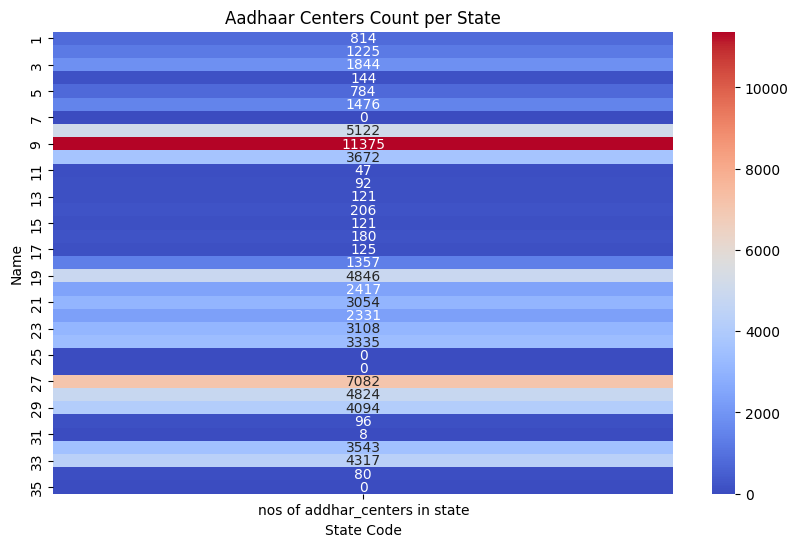

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data with Aadhaar centers count per state
data = pd.read_csv('filtered_pop_with_centers.csv')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[['State  Code', 'nos of addhar_centers in state']].pivot_table(index='State  Code', aggfunc='sum'), cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Aadhaar Centers Count per State')
plt.xlabel('State Code')
plt.ylabel('Name')
plt.show()
